In [1]:
# import the necessary packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import gridspec


In [2]:
# Load the dataset from the csv file using pandas
# best way is to mount the drive on colab and 
# copy the path for the csv file
data = pd.read_csv("creditcardfraud.csv")


In [3]:
# Grab a peek at the data
data.head()


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,111096.0,2.095273,0.005363,-1.448645,0.320803,0.366733,-0.647091,-0.007670,-0.280977,2.187868,...,0.090701,0.622382,0.006800,0.352553,0.323243,-0.466764,-0.026065,-0.058691,1.00,0
1,79272.0,1.158282,-0.180178,0.967549,0.888652,-0.957101,-0.412826,-0.436789,-0.008261,0.808686,...,0.074346,0.398780,-0.123952,0.457047,0.485607,0.507722,0.001095,0.022840,29.90,0
2,132593.0,1.953608,-0.626281,-0.273542,0.523814,-1.008114,-0.605656,-0.737915,0.030429,1.513787,...,0.150353,0.537825,0.159876,-0.009313,-0.335374,0.573685,-0.033367,-0.047451,28.75,0
3,152511.0,0.191138,0.975684,-0.306871,-0.184487,0.998363,-1.317371,1.216015,-0.518100,0.015540,...,0.236043,1.134086,-0.216546,-0.053337,-0.329110,-0.167737,0.229836,-0.028356,8.61,0
4,140096.0,-3.539055,-4.193024,-3.026249,2.160445,3.760330,-2.281773,0.117071,0.305625,-1.052794,...,1.172759,1.406402,0.650456,0.282794,-0.968230,-0.437851,0.445302,-0.347395,329.96,0


In [4]:
# Print the shape of the data
# data = data.sample(frac = 0.1, random_state = 48)
print(data.shape)
print(data.describe())


(10492, 31)
                Time            V1            V2            V3            V4  \
count   10492.000000  10492.000000  10492.000000  10492.000000  10492.000000   
mean    93684.105700     -0.249338      0.147207     -0.319251      0.206661   
std     47295.911703      2.679344      2.184289      2.587227      1.782261   
min        10.000000    -46.855047    -60.464618    -31.103685     -4.826127   
25%     53381.000000     -1.009196     -0.570226     -1.035594     -0.813001   
50%     83632.500000     -0.051853      0.115159      0.119919      0.054051   
75%    138225.250000      1.282531      0.877200      0.982344      0.905784   
max    172787.000000      2.408046     22.057729      3.802986     16.875344   

                 V5            V6            V7            V8            V9  \
count  10492.000000  10492.000000  10492.000000  10492.000000  10492.000000   
mean      -0.149669     -0.090609     -0.265507      0.037047     -0.111551   
std        1.835993      1.337

In [6]:
# Determine number of fraud cases in dataset
fraud = data[data['Class'] == 1]
valid = data[data['Class'] == 0]
outlierFraction = len(fraud)/float(len(valid))
print(outlierFraction)
print('Fraud Cases: {}'.format(len(data[data['Class'] == 1])))
print('Valid Transactions: {}'.format(len(data[data['Class'] == 0])))


0.0492
Fraud Cases: 492
Valid Transactions: 10000


In [8]:
print('Amount details of the fraudulent transaction')
fraud.Amount.describe()


Amount details of the fraudulent transaction


count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

In [9]:
print('details of valid transaction')
valid.Amount.describe()


details of valid transaction


count    10000.000000
mean        88.726354
std        310.957193
min          0.000000
25%          5.370000
50%         21.900000
75%         75.460000
max      18910.000000
Name: Amount, dtype: float64

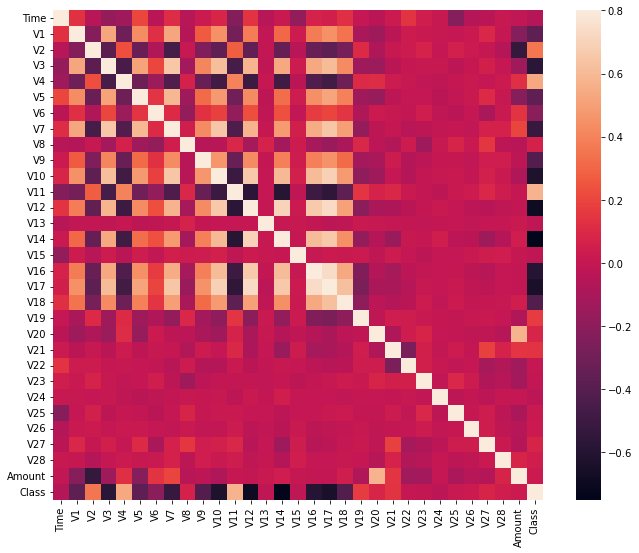

In [10]:
# Correlation matrix
corrmat = data.corr()
fig = plt.figure(figsize = (12, 9))
sns.heatmap(corrmat, vmax = .8, square = True)
plt.show()


In [11]:
# dividing the X and the Y from the dataset
X = data.drop(['Class'], axis = 1)
Y = data["Class"]
print(X.shape)
print(Y.shape)
# getting just the values for the sake of processing 
# (its a numpy array with no columns)
xData = X.values
yData = Y.values


(10492, 30)
(10492,)


In [12]:
# Using Scikit-learn to split data into training and testing sets
from sklearn.model_selection import train_test_split
# Split the data into training and testing sets
xTrain, xTest, yTrain, yTest = train_test_split(
        xData, yData, test_size = 0.2, random_state = 42)


In [13]:
# Building the Random Forest Classifier (RANDOM FOREST)
from sklearn.ensemble import RandomForestClassifier
# random forest model creation
rfc = RandomForestClassifier()
rfc.fit(xTrain, yTrain)
# predictions
yPred = rfc.predict(xTest)


In [14]:
# Evaluating the classifier
# printing every score of the classifier
# scoring in anything
from sklearn.metrics import classification_report, accuracy_score 
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import f1_score, matthews_corrcoef
from sklearn.metrics import confusion_matrix

n_outliers = len(fraud)
n_errors = (yPred != yTest).sum()
print("The model used is Random Forest classifier")

acc = accuracy_score(yTest, yPred)
print("The accuracy is {}".format(acc))

prec = precision_score(yTest, yPred)
print("The precision is {}".format(prec))

rec = recall_score(yTest, yPred)
print("The recall is {}".format(rec))

f1 = f1_score(yTest, yPred)
print("The F1-Score is {}".format(f1))

MCC = matthews_corrcoef(yTest, yPred)
print("The Matthews correlation coefficient is{}".format(MCC))


The model used is Random Forest classifier
The accuracy is 0.9899952358265841
The precision is 0.975
The recall is 0.8041237113402062
The F1-Score is 0.8813559322033899
The Matthews correlation coefficient is0.880618366683568


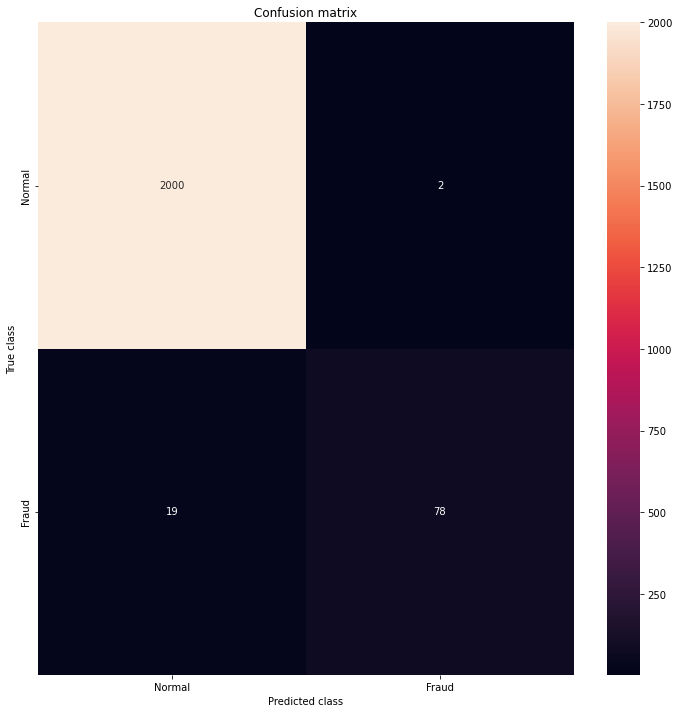

In [15]:
# printing the confusion matrix
LABELS = ['Normal', 'Fraud']
conf_matrix = confusion_matrix(yTest, yPred)
plt.figure(figsize =(12, 12))
sns.heatmap(conf_matrix, xticklabels = LABELS, 
            yticklabels = LABELS, annot = True, fmt ="d");
plt.title("Confusion matrix")
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.show()
